# NAFNet on Image Denoising (Modified from NAF Demo)

## Git clone [NAFNet](https://github.com/megvii-research/NAFNet) repo

In [1]:
!git clone https://github.com/megvii-research/NAFNet
%cd NAFNet
%pwd

c:\Users\User\Documents\GitHub\NYCU-Digital-Image-Process\NAFNet


Cloning into 'NAFNet'...


'c:\\Users\\User\\Documents\\GitHub\\NYCU-Digital-Image-Process\\NAFNet'

## Set up the enviroment

### install pytorch 
* from this [link](https://pytorch.org/get-started/locally/)
* You may need to change the cmd line below to the new line from the link.

In [6]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118
  Using cached https://download.pytorch.org/whl/mpmath-1.3.0-py3-none-any.whl (536 kB)
   ---------------------------------------- 0.0/2.8 GB ? eta -:--:--
   ---------------------------------------- 0.0/2.8 GB 6.8 MB/s eta 0:06:52
   ---------------------------------------- 0.0/2.8 GB 5.0 MB/s eta 0:09:20
   ---------------------------------------- 0.0/2.8 GB 5.8 MB/s eta 0:08:08
   ---------------------------------------- 0.0/2.8 GB 5.8 MB/s eta 0:08:05
   ---------------------------------------- 0.0/2.8 GB 5.0 MB/s eta 0:09:25
   ---------------------------------------- 0.0/2.8 GB 4.7 MB/s eta 0:09:53
   ---------------------------------------- 0.0/2.8 GB 4.8 MB/s eta 0:09:46
   ---------------------------------------- 0.0/2.8 GB 4.7 MB/s eta 0:09:54
   ---------------------------------------- 0.0/2.8 GB 4.7 MB/s eta 0:09:59
   ---------------------------------------- 0.0/2.8 GB 4.7 MB/s eta 0:10:03
   ----------------------

### install matplotlib 

In [8]:
!pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 4.9 MB/s eta 0:00:02
   ---------- ----------------------------- 2.1/8.1 MB 6.0 MB/s eta 0:00:01
   --------------- ------------------------ 3.1/8.1 MB 5.5 MB/s eta 0:00:01
   -------------------- ------------------- 4.2/8.1 MB 5.5 MB/s eta 0:00:01
   ---------------------------- ----------- 5.8/8.1 MB 6.0 MB/s eta 0:00:01
   --------------------------------- ------ 6.8/8.1 MB 5.8 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 5.9 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ------------------------------------- -- 2.1/2.2 MB 9.8 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 9.3 MB/s eta 0:00:00

   ---------------------------------------- 0/6 [pyparsing]


### install other requirements for the cloned repo 

In [2]:
!pip install -r requirements.txt
!pip install --upgrade --no-cache-dir gdown
!python3 setup.py develop --no_cuda_ext

  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached charset_normalizer-3.4.2-cp313-cp313-win_amd64.whl.metadata (36 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached urllib3-2.4.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached certifi-2025.4.26-py3-none-any.whl.metadata (2.5 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Using cached werkzeug-3.1.3-py3-none-any.whl.metadata (3.7 kB)
  Using cached MarkupSafe-3.0.2-cp313-cp313-win_amd64.whl.metadata (4.1 kB)
   ---------------------------------------- 0.0/12.7 MB ? eta -:--:--
   --- ------------------------------------ 1.0/12.7 MB 5.4 MB/s eta 0:00:03
   ------- -------------------------------- 2.4/12.7 MB 5.5 MB/s eta 0:00:02
   ----------- ---------------------------- 3.7/12.7 MB 6.1 MB/s eta 0:00:02
   -------------- ------------------------- 4.7/12.7 MB 5.6 MB/s eta 0:00:02
   ------------------ --------------------- 6.0/12.7 MB 5.8 MB/s e

## Download pretrained models

In [ ]:
import gdown
## download NAFNet-SIDD-width64.pth
gdown.download('https://drive.google.com/uc?id=14Fht1QQJ2gMlk4N1ERCRuElg8JfjrWWR', "./experiments/pretrained_models/", quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=14Fht1QQJ2gMlk4N1ERCRuElg8JfjrWWR
From (redirected): https://drive.google.com/uc?id=14Fht1QQJ2gMlk4N1ERCRuElg8JfjrWWR&confirm=t&uuid=0e7ba920-20d9-4917-b9d4-cd6d2719b150
To: c:\Users\User\Documents\GitHub\NYCU-Digital-Image-Process\NAFNet\NAFNet-SIDD-width64.pth
100%|██████████| 464M/464M [00:40<00:00, 11.4MB/s] 


'NAFNet-SIDD-width64.pth'

## Preparation

In [9]:
import torch

from basicsr.models import create_model
from basicsr.utils import img2tensor as _img2tensor, tensor2img, imwrite
from basicsr.utils.options import parse
import numpy as np
import cv2
import matplotlib.pyplot as plt

def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img
def img2tensor(img, bgr2rgb=False, float32=True):
    img = img.astype(np.float32) / 255.
    return _img2tensor(img, bgr2rgb=bgr2rgb, float32=float32)

def display(img1, img2):
  fig = plt.figure(figsize=(25, 10))
  ax1 = fig.add_subplot(1, 2, 1)
  plt.title('Input image', fontsize=16)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, 2, 2)
  plt.title('NAFNet output', fontsize=16)
  ax2.axis('off')
  ax1.imshow(img1)
  ax2.imshow(img2)

def single_image_inference(model, img, save_path):
      model.feed_data(data={'lq': img.unsqueeze(dim=0)})

      if model.opt['val'].get('grids', False):
          model.grids()

      model.test()

      if model.opt['val'].get('grids', False):
          model.grids_inverse()

      visuals = model.get_current_visuals()
      sr_img = tensor2img([visuals['result']])
      imwrite(sr_img, save_path)


## Create Model

In [16]:
opt_path = 'options/test/SIDD/NAFNet-width64.yml'
opt = parse(opt_path, is_train=False)
opt['dist'] = False
NAFNet = create_model(opt)

 load net keys <built-in method keys of collections.OrderedDict object at 0x000001DB2B9927C0>


2025-06-10 14:56:39,839 INFO: Model [ImageRestorationModel] is created.


# Inference and Show results

In [17]:
import os
output_folder = '../output_images'

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

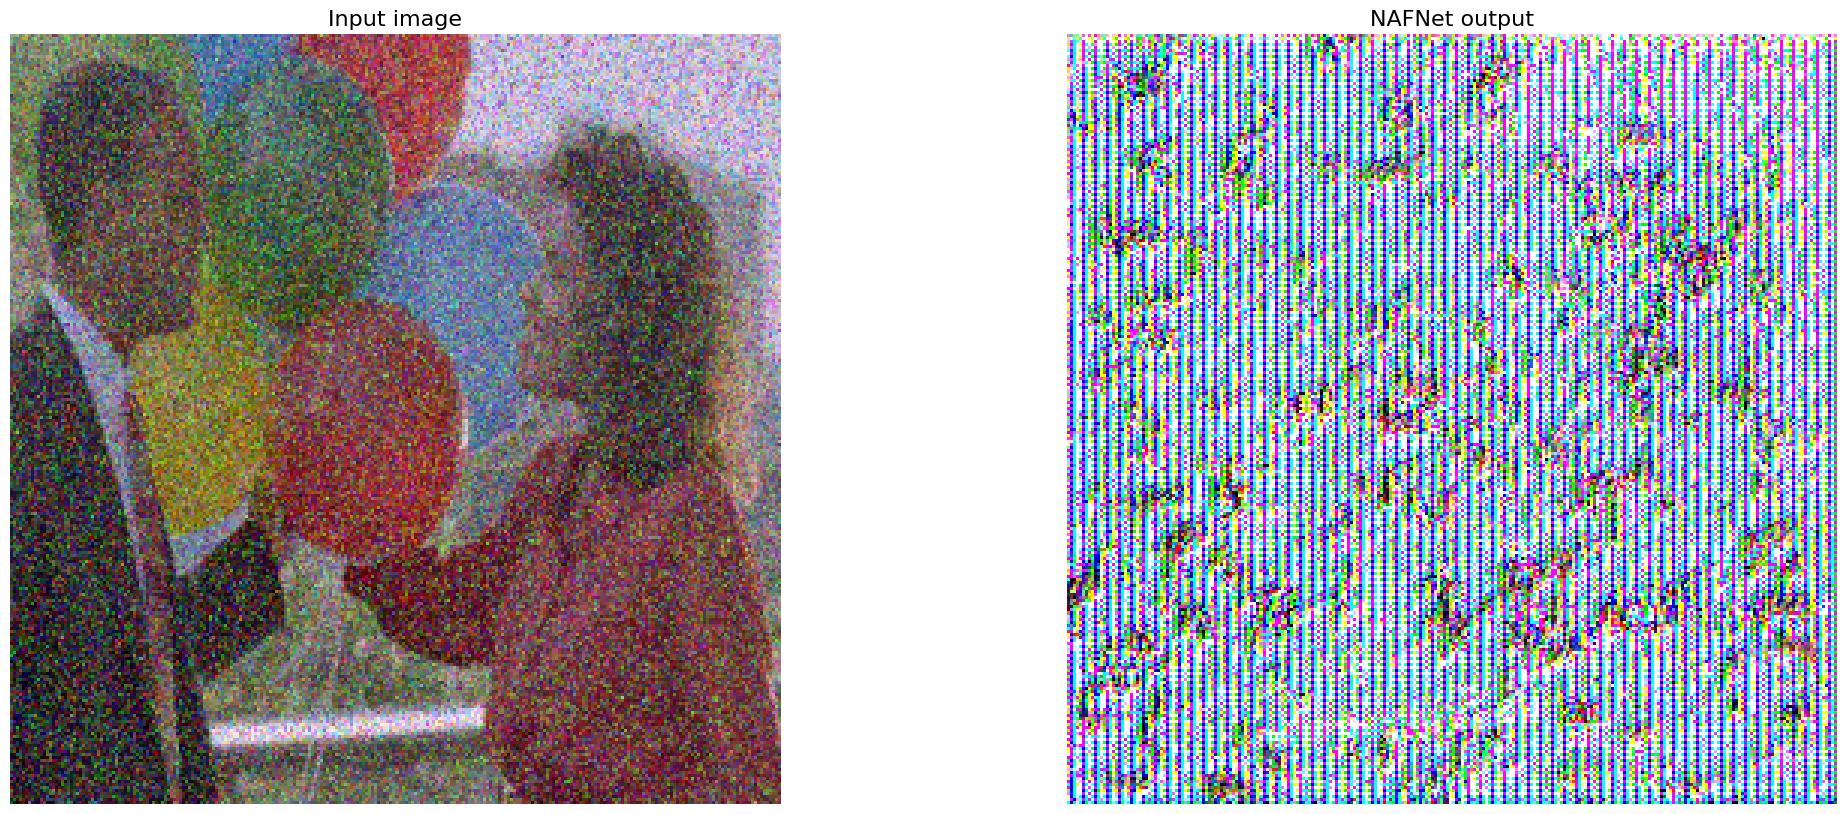

In [18]:
input_path = '../original_images/balloons.png'
output_path = '../output_images/balloons.png'

img_input = imread(input_path)
inp = img2tensor(img_input)
single_image_inference(NAFNet, inp, output_path)
img_output = imread(output_path)
display(img_input, img_output)

# Try it on uploaded images (not used)

## 1. Upload images

In [ ]:
import os
from google.colab import files
import shutil

upload_folder = 'upload/input'
result_folder = 'upload/output'

if os.path.isdir(upload_folder):
    shutil.rmtree(upload_folder)
if os.path.isdir(result_folder):
    shutil.rmtree(result_folder)
os.makedirs(upload_folder)
os.makedirs(result_folder)

# upload images
uploaded = files.upload()
for filename in uploaded.keys():
  dst_path = os.path.join(upload_folder, filename)
  print(f'move {filename} to {dst_path}')
  shutil.move(filename, dst_path)

## Inference

In [ ]:
import glob
input_list = sorted(glob.glob(os.path.join(upload_folder, '*')))
for input_path in input_list:
  img_input = imread(input_path)
  inp = img2tensor(img_input)
  output_path = os.path.join(result_folder, os.path.basename(input_path))
  single_image_inference(NAFNet, inp, output_path)

## 3. Visualize (Optional)

In [ ]:
# visualize
input_list = sorted(glob.glob(os.path.join(upload_folder, '*')))
output_list = sorted(glob.glob(os.path.join(result_folder, '*')))
for input_path, output_path in zip(input_list, output_list):
  img_input = imread(input_path)
  img_output = imread(output_path)
  display(img_input, img_output)

## 4. Download results

In [ ]:
# download the result
print(f'Download {result_folder}')
os.system(f'zip -r -j download.zip {result_folder}/*')
files.download("download.zip")